<a href="https://colab.research.google.com/github/iam1997/Project-Deep-Learning-of-Artificial-Intelligence/blob/main/Project_DL_V4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
# Import Libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

### **Define all functions**

In [66]:
def sigmoid(Z):
    """
    Implements the sigmoid activation in numpy
    
    Arguments:
    Z -- numpy array of any shape
    
    Returns:
    A -- output of sigmoid(z), same shape as Z
    cache -- returns Z as well, useful during backpropagation
    """
    
    A = 1/(1+np.exp(-Z))
    cache = Z
    
    return A, cache

def relu(Z):
    """
    Implement the RELU function.

    Arguments:
    Z -- Output of the linear layer, of any shape

    Returns:
    A -- Post-activation parameter, of the same shape as Z
    cache -- a python dictionary containing "A" ; stored for computing the backward pass efficiently
    """
    
    A = np.maximum(0,Z)
    
    assert(A.shape == Z.shape)
    
    cache = Z 
    return A, cache


def relu_backward(dA, cache):
    """
    Implement the backward propagation for a single RELU unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    
    Z = cache
    dZ = np.array(dA, copy=True) # just converting dz to a correct object.
    
    # When z <= 0, you should set dz to 0 as well. 
    dZ[Z <= 0] = 0
    
    assert (dZ.shape == Z.shape)
    
    return dZ

def sigmoid_backward(dA, cache):
    """
    Implement the backward propagation for a single SIGMOID unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    
    Z = cache
    
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    
    assert (dZ.shape == Z.shape)
    
    return dZ

def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    parameters -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """
    
    np.random.seed(1)
    
    W1 = np.random.randn(n_h, n_x)*0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h)*0.01
    b2 = np.zeros((n_y, 1))
    
    assert(W1.shape == (n_h, n_x))
    assert(b1.shape == (n_h, 1))
    assert(W2.shape == (n_y, n_h))
    assert(b2.shape == (n_y, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters     


def initialize_parameters_deep(layer_dims):
    """
    Arguments:
    layer_dims -- python array (list) containing the dimensions of each layer in our network
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    bl -- bias vector of shape (layer_dims[l], 1)
    """
    
    np.random.seed(1)
    parameters = {}
    L = len(layer_dims)            # number of layers in the network

    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) / np.sqrt(layer_dims[l-1]) #*0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
        
        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))

        
    return parameters

def linear_forward(A, W, b):
    """
    Implement the linear part of a layer's forward propagation.

    Arguments:
    A -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)

    Returns:
    Z -- the input of the activation function, also called pre-activation parameter 
    cache -- a python dictionary containing "A", "W" and "b" ; stored for computing the backward pass efficiently
    """
    
    Z = W.dot(A) + b
    
    assert(Z.shape == (W.shape[0], A.shape[1]))
    cache = (A, W, b)
    
    return Z, cache

def linear_activation_forward(A_prev, W, b, activation):
    """
    Implement the forward propagation for the LINEAR->ACTIVATION layer

    Arguments:
    A_prev -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"

    Returns:
    A -- the output of the activation function, also called the post-activation value 
    cache -- a python dictionary containing "linear_cache" and "activation_cache";
             stored for computing the backward pass efficiently
    """
    
    if activation == "sigmoid":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)
    
    elif activation == "relu":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)
    
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)

    return A, cache

def L_model_forward(X, parameters):
    """
    Implement forward propagation for the [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID computation
    
    Arguments:
    X -- data, numpy array of shape (input size, number of examples)
    parameters -- output of initialize_parameters_deep()
    
    Returns:
    AL -- last post-activation value
    caches -- list of caches containing:
                every cache of linear_relu_forward() (there are L-1 of them, indexed from 0 to L-2)
                the cache of linear_sigmoid_forward() (there is one, indexed L-1)
    """

    caches = []
    A = X
    L = len(parameters) // 2                  # number of layers in the neural network
    
    # Implement [LINEAR -> RELU]*(L-1). Add "cache" to the "caches" list.
    for l in range(1, L):
        A_prev = A 
        A, cache = linear_activation_forward(A_prev, parameters['W' + str(l)], parameters['b' + str(l)], activation = "relu")
        caches.append(cache)
    
    # Implement LINEAR -> SIGMOID. Add "cache" to the "caches" list.
    AL, cache = linear_activation_forward(A, parameters['W' + str(L)], parameters['b' + str(L)], activation = "sigmoid")
    caches.append(cache)
    
    assert(AL.shape == (1,X.shape[1]))
            
    return AL, caches

def compute_cost(AL, Y):
    """
    Implement the cost function defined by equation (7).

    Arguments:
    AL -- probability vector corresponding to your label predictions, shape (1, number of examples)
    Y -- true "label" vector (for example: containing 0 if non-cat, 1 if cat), shape (1, number of examples)

    Returns:
    cost -- cross-entropy cost
    """
    
    m = Y.shape[1]

    # Compute loss from aL and y.
    cost = (1./m) * (-np.dot(Y,np.log(AL).T) - np.dot(1-Y, np.log(1-AL).T))
    
    cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
    assert(cost.shape == ())
    
    return cost

def linear_backward(dZ, cache):
    """
    Implement the linear portion of backward propagation for a single layer (layer l)

    Arguments:
    dZ -- Gradient of the cost with respect to the linear output (of current layer l)
    cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer

    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    A_prev, W, b = cache
    m = A_prev.shape[1]

    dW = 1./m * np.dot(dZ,A_prev.T)
    db = 1./m * np.sum(dZ, axis = 1, keepdims = True)
    dA_prev = np.dot(W.T,dZ)
    
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    return dA_prev, dW, db

def linear_activation_backward(dA, cache, activation):
    """
    Implement the backward propagation for the LINEAR->ACTIVATION layer.
    
    Arguments:
    dA -- post-activation gradient for current layer l 
    cache -- tuple of values (linear_cache, activation_cache) we store for computing backward propagation efficiently
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"
    
    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    linear_cache, activation_cache = cache
    
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
        
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ, linear_cache)
    
    return dA_prev, dW, db

def L_model_backward(AL, Y, caches):
    """
    Implement the backward propagation for the [LINEAR->RELU] * (L-1) -> LINEAR -> SIGMOID group
    
    Arguments:
    AL -- probability vector, output of the forward propagation (L_model_forward())
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat)
    caches -- list of caches containing:
                every cache of linear_activation_forward() with "relu" (there are (L-1) or them, indexes from 0 to L-2)
                the cache of linear_activation_forward() with "sigmoid" (there is one, index L-1)
    
    Returns:
    grads -- A dictionary with the gradients
             grads["dA" + str(l)] = ... 
             grads["dW" + str(l)] = ...
             grads["db" + str(l)] = ... 
    """
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
    
    # Initializing the backpropagation
    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    
    # Lth layer (SIGMOID -> LINEAR) gradients. Inputs: "AL, Y, caches". Outputs: "grads["dAL"], grads["dWL"], grads["dbL"]
    current_cache = caches[L-1]
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, activation = "sigmoid")
    
    for l in reversed(range(L-1)):
        # lth layer: (RELU -> LINEAR) gradients.
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l + 1)], current_cache, activation = "relu")
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp

    return grads

def update_parameters(parameters, grads, learning_rate):
    """
    Update parameters using gradient descent
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients, output of L_model_backward
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
                  parameters["W" + str(l)] = ... 
                  parameters["b" + str(l)] = ...
    """
    
    L = len(parameters) // 2 # number of layers in the neural network

    # Update rule for each parameter. Use a for loop.
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l+1)]
        
    return parameters

def predict(X, y, parameters, test):
    """
    This function is used to predict the results of a  L-layer neural network.
    
    Arguments:
    X -- data set of examples you would like to label
    parameters -- parameters of the trained model
    
    Returns:
    p -- predictions for the given dataset X
    """
    
    m = X.shape[1]
    n = len(parameters) // 2 # number of layers in the neural network
    p = np.zeros((1,m))
    
    # Forward propagation
    probas, caches = L_model_forward(X, parameters)

    
    # convert probas to 0/1 predictions
    for i in range(0, probas.shape[1]):
        if probas[0,i] > 0.9:
            p[0,i] = 1
        else:
            p[0,i] = 0

  
    acurracy = np.sum((p == y)/m)
    if test == True:
      print("Accuracy of the training set: "  + str(np.sum((p == y)/m)))
    else:
      print("Accuracy of the test set:     "  + str(np.sum((p == y)/m)) + '\n')

    return p, acurracy

def print_mislabeled_images(classes, X, y, p):
    """
    Plots images where predictions and truth were different.
    X -- dataset
    y -- true labels
    p -- predictions
    """
    a = p + y
    mislabeled_indices = np.asarray(np.where(a == 1))
    plt.rcParams['figure.figsize'] = (40.0, 40.0) # set default size of plots
    num_images = len(mislabeled_indices[0])
    for i in range(num_images):
        index = mislabeled_indices[1][i]
        
        plt.subplot(2, num_images, i + 1)
        plt.imshow(X[:,index].reshape(64,64,3), interpolation='nearest')
        plt.axis('off')
        plt.title("Prediction: " + classes[int(p[0,index])].decode("utf-8") + " \n Class: " + classes[y[0,index]].decode("utf-8"))

def two_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
    """
    Implements a two-layer neural network: LINEAR->RELU->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (n_x, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- dimensions of the layers (n_x, n_h, n_y)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- If set to True, this will print the cost every 100 iterations 
    
    Returns:
    parameters -- a dictionary containing W1, W2, b1, and b2
    """
    
    np.random.seed(1)
    grads = {}
    costs = []                              # to keep track of the cost
    m = X.shape[1]                           # number of examples
    (n_x, n_h, n_y) = layers_dims
    
    # Initialize parameters dictionary, by calling one of the functions you'd previously implemented
    ### START CODE HERE ### (≈ 1 line of code)
    parameters = initialize_parameters(n_x, n_h, n_y)
    ### END CODE HERE ###
    
    # Get W1, b1, W2 and b2 from the dictionary parameters.
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Loop (gradient descent)

    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> SIGMOID. Inputs: "X, W1, b1, W2, b2". Output: "A1, cache1, A2, cache2".
        ### START CODE HERE ### (≈ 2 lines of code)
        A1, cache1 = linear_activation_forward(X, W1, b1, activation= "relu")
        A2, cache2 = linear_activation_forward(A1, W2, b2, activation= "sigmoid")
        ### END CODE HERE ###
        
        # Compute cost
        ### START CODE HERE ### (≈ 1 line of code)
        cost = compute_cost(A2, Y)
        ### END CODE HERE ###
        
        # Initializing backward propagation
        dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))
        
        # Backward propagation. Inputs: "dA2, cache2, cache1". Outputs: "dA1, dW2, db2; also dA0 (not used), dW1, db1".
        ### START CODE HERE ### (≈ 2 lines of code)
        dA1, dW2, db2 = linear_activation_backward(dA2, cache2, activation = "sigmoid")
        dA0, dW1, db1 = linear_activation_backward(dA1, cache1, activation = "relu")
        ### END CODE HERE ###
        
        # Set grads['dWl'] to dW1, grads['db1'] to db1, grads['dW2'] to dW2, grads['db2'] to db2
        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2
        
        # Update parameters.
        ### START CODE HERE ### (approx. 1 line of code)
        parameters = update_parameters(parameters, grads, learning_rate)
        ### END CODE HERE ###

        # Retrieve W1, b1, W2, b2 from parameters
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if print_cost and i % 100 == 0:
            costs.append(cost)
       
    # plot the cost

    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (number of examples, num_px * num_px * 3)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(1)
    costs = []                         # keep track of cost
    
    # Parameters initialization.
    parameters = initialize_parameters_deep(layers_dims)
    print('Layer dimensions: ' + str(layers_dims))
    print('Learning Rate   : ' + str(learning_rate))
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        AL, caches = L_model_forward(X, parameters)
        
        # Compute cost.
        cost = compute_cost(AL, Y)
    
        # Backward propagation
        grads = L_model_backward(AL, Y, caches)
 
        # Update parameters
        parameters = update_parameters(parameters, grads, learning_rate)
       
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    # Plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

def plotAcurracy(y_axis1, y_axis2, title):
  plt.figure(figsize=(16, 3))
  line1, = plt.plot(np.arange(len(y_axis1)),y_axis1, label = 'Training acurracy')
  line2, = plt.plot(np.arange(len(y_axis2)),y_axis2, label = 'Test acurracy')
  plt.legend(handles = [line1, line2])
  plt.title(title)
  plt.xlabel('Iteration')
  plt.ylabel('Acurracy')
  plt.show()


### **Import the MNIST-Dataset**

In [56]:
# Import the MNIST-Dataset
digits = load_digits()

In [57]:
#Split the dataset into training and test examples
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size= 0.2, random_state= 123)

In [58]:
# Convert the tuples to numpy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [59]:
# Show the structure of the training dataset
(unique, counts) = np.unique(y_train, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print('Number of training examples of the original dataset: ' + str(X_train.shape[0]))
print('Structure of the training dataset')
print(frequencies)

# Show the structure of the test dataset
(unique, counts) = np.unique(y_test, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print('\nNumber of test examples of the original dataset: ' + str(X_test.shape[0]))
print('Structure of the test dataset')
print(frequencies)

Number of training examples of the original dataset: 1437
Structure of the training dataset
[[  0 139]
 [  1 148]
 [  2 141]
 [  3 150]
 [  4 139]
 [  5 145]
 [  6 138]
 [  7 148]
 [  8 137]
 [  9 152]]

Number of test examples of the original dataset: 360
Structure of the test dataset
[[ 0 39]
 [ 1 34]
 [ 2 36]
 [ 3 33]
 [ 4 42]
 [ 5 37]
 [ 6 43]
 [ 7 31]
 [ 8 37]
 [ 9 28]]


In [60]:
# Relabel the dataset to have only an one-class classification 
# Label 0 -> 0, 2, 3, 4, 5, 6, 7, 8, 9
# Label 1 -> 1
y_train = np.where(y_train == 1, y_train, 0)
y_test = np.where(y_test == 1, y_test, 0)

In [61]:
# Show the structure of the training dataset
(unique, counts) = np.unique(y_train, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print('Number of training examples of the modified dataset: ' + str(X_train.shape[0]))
print('Structure of the training dataset')
print(frequencies)

# Show the structure of the test dataset
(unique, counts) = np.unique(y_test, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print('\nNumber of test examples of the modified dataset: ' + str(X_test.shape[0]))
print('Structure of the test dataset')
print(frequencies)

# Show the image size
print('\nEach image has the size: (' + str(int(X_train.shape[1]/8)) + ', ' + str(int(X_train.shape[1]/8)) + ', 1)')
print('--> Equal to ' + str(int(X_train.shape[1]*X_train.shape[1]*1/64)) + ' pixels')

Number of training examples of the modified dataset: 1437
Structure of the training dataset
[[   0 1289]
 [   1  148]]

Number of test examples of the modified dataset: 360
Structure of the test dataset
[[  0 326]
 [  1  34]]

Each image has the size: (8, 8, 1)
--> Equal to 64 pixels


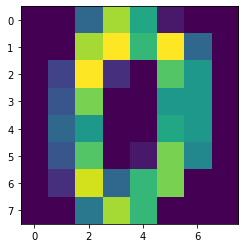

In [40]:
# Show a random image of the test dataset
plt.imshow(digits.images[0]);

In [62]:
# Reshape the dataset 
X_train_flatten = X_train.reshape(X_train.shape[0], -1).T
X_test_flatten = X_test.reshape(X_test.shape[0], -1).T
y_train = y_train.reshape((1, y_train.shape[0]))
y_test = y_test.reshape((1, y_test.shape[0]))

# Show the shapes of the dataset
print('Shape of x_train: ' + str(X_train_flatten.shape))
print('Shape of x_test: ' + str(X_test_flatten.shape))
print('Shape of y_train: ' + str(y_train.shape))
print('Shape of y_test: ' + str(y_test.shape))

Shape of x_train: (64, 1437)
Shape of x_test: (64, 360)
Shape of y_train: (1, 1437)
Shape of y_test: (1, 360)


In [63]:
# Standardize the data to have feature values between 0 and 1.
X_train_standardize = X_train_flatten/255.
X_test_standardize = X_test_flatten/255.

### **2-Layer Neural Network**

Layer dimensions: [64, 1, 1]
Learning Rate   : 1
Cost after iteration 0: 0.693183
Cost after iteration 100: 0.331609
Cost after iteration 200: 0.331609
Cost after iteration 300: 0.331609
Cost after iteration 400: 0.331609
Cost after iteration 500: 0.331609
Cost after iteration 600: 0.331609
Cost after iteration 700: 0.331609
Cost after iteration 800: 0.331609
Cost after iteration 900: 0.331609
Cost after iteration 1000: 0.331609
Cost after iteration 1100: 0.331609
Cost after iteration 1200: 0.331609
Cost after iteration 1300: 0.331609
Cost after iteration 1400: 0.331609
Cost after iteration 1500: 0.331609
Cost after iteration 1600: 0.331609
Cost after iteration 1700: 0.331609
Cost after iteration 1800: 0.331609
Cost after iteration 1900: 0.331609
Cost after iteration 2000: 0.331609
Cost after iteration 2100: 0.331609
Cost after iteration 2200: 0.331609
Cost after iteration 2300: 0.331609
Cost after iteration 2400: 0.331609


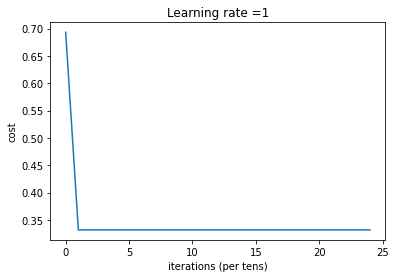

Accuracy of the training set: 0.8970076548364648
Accuracy of the test set:     0.9055555555555556

Layer dimensions: [64, 11, 1]
Learning Rate   : 1
Cost after iteration 0: 0.688756
Cost after iteration 100: 0.318513
Cost after iteration 200: 0.276622
Cost after iteration 300: 0.206269
Cost after iteration 400: 0.176246
Cost after iteration 500: 0.153527
Cost after iteration 600: 0.135057
Cost after iteration 700: 0.119131
Cost after iteration 800: 0.106264
Cost after iteration 900: 0.096925
Cost after iteration 1000: 0.089982
Cost after iteration 1100: 0.083345
Cost after iteration 1200: 0.080917
Cost after iteration 1300: 0.071194
Cost after iteration 1400: 0.124293
Cost after iteration 1500: 0.058527
Cost after iteration 1600: 0.056323
Cost after iteration 1700: 0.054388
Cost after iteration 1800: 0.052711
Cost after iteration 1900: 0.090653
Cost after iteration 2000: 0.051253
Cost after iteration 2100: 0.049783
Cost after iteration 2200: 0.048464
Cost after iteration 2300: 0.047259

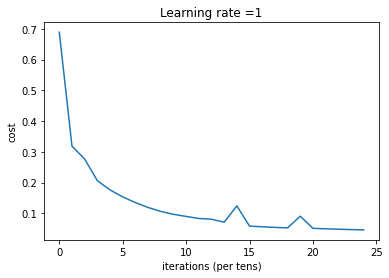

Accuracy of the training set: 0.9610299234516354
Accuracy of the test set:     0.9583333333333334

Layer dimensions: [64, 21, 1]
Learning Rate   : 1
Cost after iteration 0: 0.683738
Cost after iteration 100: 0.318167
Cost after iteration 200: 0.276743
Cost after iteration 300: 0.213164
Cost after iteration 400: 0.218060
Cost after iteration 500: 0.189561
Cost after iteration 600: 0.158928
Cost after iteration 700: 0.133679
Cost after iteration 800: 0.115833
Cost after iteration 900: 0.103259
Cost after iteration 1000: 0.095075
Cost after iteration 1100: 0.087054
Cost after iteration 1200: 0.082941
Cost after iteration 1300: 0.075815
Cost after iteration 1400: 0.101855
Cost after iteration 1500: 0.058336
Cost after iteration 1600: 0.056162
Cost after iteration 1700: 0.170442
Cost after iteration 1800: 0.053855
Cost after iteration 1900: 0.052100
Cost after iteration 2000: 0.050544
Cost after iteration 2100: 0.049139
Cost after iteration 2200: 0.047868
Cost after iteration 2300: 0.049268

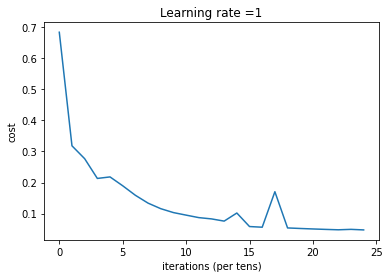

Accuracy of the training set: 0.9596381350034795
Accuracy of the test set:     0.9583333333333334

Layer dimensions: [64, 31, 1]
Learning Rate   : 1
Cost after iteration 0: 0.691490
Cost after iteration 100: 0.317395
Cost after iteration 200: 0.272745
Cost after iteration 300: 0.193194
Cost after iteration 400: 0.171777
Cost after iteration 500: 0.148944
Cost after iteration 600: 0.130111
Cost after iteration 700: 0.114380
Cost after iteration 800: 0.102500
Cost after iteration 900: 0.093963
Cost after iteration 1000: 0.087667
Cost after iteration 1100: 0.081754
Cost after iteration 1200: 0.077851
Cost after iteration 1300: 0.073929
Cost after iteration 1400: 0.073125
Cost after iteration 1500: 0.059316
Cost after iteration 1600: 0.062712
Cost after iteration 1700: 0.054939
Cost after iteration 1800: 0.053088
Cost after iteration 1900: 0.051448
Cost after iteration 2000: 0.049959
Cost after iteration 2100: 0.048595
Cost after iteration 2200: 0.048056
Cost after iteration 2300: 0.048163

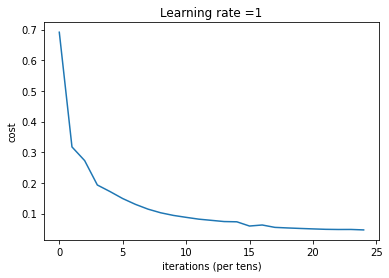

Accuracy of the training set: 0.9610299234516354
Accuracy of the test set:     0.9638888888888889

Layer dimensions: [64, 41, 1]
Learning Rate   : 1
Cost after iteration 0: 0.702064
Cost after iteration 100: 0.316047
Cost after iteration 200: 0.269002
Cost after iteration 300: 0.188082
Cost after iteration 400: 0.170353
Cost after iteration 500: 0.147653
Cost after iteration 600: 0.128917
Cost after iteration 700: 0.113344
Cost after iteration 800: 0.101945
Cost after iteration 900: 0.093275
Cost after iteration 1000: 0.087337
Cost after iteration 1100: 0.081064
Cost after iteration 1200: 0.079793
Cost after iteration 1300: 0.068296
Cost after iteration 1400: 0.084961
Cost after iteration 1500: 0.058534
Cost after iteration 1600: 0.056388
Cost after iteration 1700: 0.054485
Cost after iteration 1800: 0.052764
Cost after iteration 1900: 0.051365
Cost after iteration 2000: 0.052529
Cost after iteration 2100: 0.049988
Cost after iteration 2200: 0.048639
Cost after iteration 2300: 0.047410

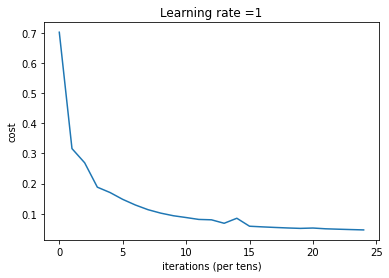

Accuracy of the training set: 0.9603340292275575
Accuracy of the test set:     0.9583333333333334

Layer dimensions: [64, 51, 1]
Learning Rate   : 1
Cost after iteration 0: 0.690543
Cost after iteration 100: 0.313337
Cost after iteration 200: 0.260894
Cost after iteration 300: 0.197441
Cost after iteration 400: 0.168576
Cost after iteration 500: 0.146040
Cost after iteration 600: 0.127304
Cost after iteration 700: 0.112657
Cost after iteration 800: 0.101539
Cost after iteration 900: 0.092908
Cost after iteration 1000: 0.086774
Cost after iteration 1100: 0.082753
Cost after iteration 1200: 0.077507
Cost after iteration 1300: 0.070577
Cost after iteration 1400: 0.087334
Cost after iteration 1500: 0.057964
Cost after iteration 1600: 0.055794
Cost after iteration 1700: 0.053871
Cost after iteration 1800: 0.055222
Cost after iteration 1900: 0.052074
Cost after iteration 2000: 0.050456
Cost after iteration 2100: 0.049015
Cost after iteration 2200: 0.047698
Cost after iteration 2300: 0.046479

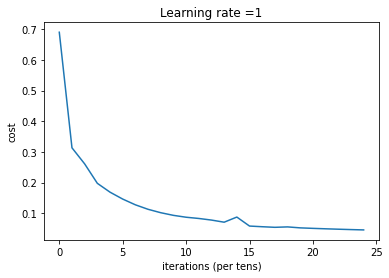

Accuracy of the training set: 0.9498956158663884
Accuracy of the test set:     0.9611111111111111

Layer dimensions: [64, 61, 1]
Learning Rate   : 1
Cost after iteration 0: 0.704496
Cost after iteration 100: 0.312700
Cost after iteration 200: 0.258222
Cost after iteration 300: 0.197074
Cost after iteration 400: 0.166560
Cost after iteration 500: 0.144564
Cost after iteration 600: 0.126297
Cost after iteration 700: 0.111294
Cost after iteration 800: 0.100232
Cost after iteration 900: 0.092110
Cost after iteration 1000: 0.086047
Cost after iteration 1100: 0.080811
Cost after iteration 1200: 0.077369
Cost after iteration 1300: 0.072489
Cost after iteration 1400: 0.060468
Cost after iteration 1500: 0.140636
Cost after iteration 1600: 0.056224
Cost after iteration 1700: 0.054292
Cost after iteration 1800: 0.052560
Cost after iteration 1900: 0.051077
Cost after iteration 2000: 0.209150
Cost after iteration 2100: 0.049544
Cost after iteration 2200: 0.048169
Cost after iteration 2300: 0.046919

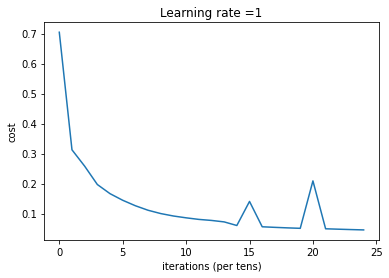

Accuracy of the training set: 0.9603340292275575
Accuracy of the test set:     0.9583333333333334



In [68]:
# Define variables to save the results and the parameters
parameters_2L_cache = []
pred_train_2L_cache = []
pred_test_2L_cache = []

for neurons_L1 in range(1, X_train_flatten.shape[0]+1, 10):
  #for learning_Rate in np.arange (0.001, 0.02, 0.001): #
    # Train the Neural Network
    layers_dims = [X_train_flatten.shape[0], neurons_L1 ,1]
    parameters = L_layer_model(X_train_standardize, y_train, layers_dims, learning_rate = 1,  num_iterations = 2500, print_cost = True)

    # Make the prediction with the training dataset
    pred_train, acurracy_train = predict(X_train_standardize, y_train, parameters, True)

    # Make the prediction with the training dataset
    pred_test, acurracy_test = predict(X_test_standardize, y_test, parameters, False)

    # Save parameters and results
    parameters_2L_cache.append(layers_dims)
    pred_train_2L_cache.append(acurracy_train)
    pred_test_2L_cache.append(acurracy_test)

### **3-Layer Neural Network**

In [ ]:
# Define variables to save the results and the parameters
parameters_3L_cache = []
pred_train_3L_cache = []
pred_test_3L_cache = []

for neurons_L2 in range(1, X_train_flatten.shape[0]+1, 10):
  for neurons_L1 in range(1, X_train_flatten.shape[0]+1, 10):
    # Train the Neural Network
    layers_dims = [x_train_flatten.shape[0], neurons_L1, neurons_L2 ,1]
    parameters = L_layer_model(x_train_standardize, y_train, layers_dims, num_iterations = 2500, print_cost = True)

    # Make the prediction with the training dataset
    pred_train, acurracy_train = predict(X_train_standardize, y_train, parameters, True)

    # Make the prediction with the training dataset
    pred_test, acurracy_test = predict(X_test_standardize, y_test, parameters, False)

    # Save parameters and results
    parameters_3L_cache.append(layers_dims)
    pred_train_3L_cache.append(acurracy_train)
    pred_test_3L_cache.append(acurracy_test)

### **4-Layer Neural Network**

In [ ]:
# Define variables to save the results and the parameters
parameters_4L_cache = []
pred_train_4L_cache = []
pred_test_4L_cache = []

for neurons_L3 in range(1, X_train_flatten.shape[0]+1, 10):
  for neurons_L2 in range(1, X_train_flatten.shape[0]+1, 10):
    for neurons_L1 in range(1, X_train_flatten.shape[0]+1, 10):
      # Train the Neural Network
      layers_dims = [x_train_flatten.shape[0], neurons_L1, neurons_L2, neurons_L3 ,1]
      parameters = L_layer_model(x_train_standardize, y_train, layers_dims, num_iterations = 2500, print_cost = True)

      # Make the prediction with the training dataset
      pred_train, acurracy_train = predict(X_train_standardize, y_train, parameters, True)

      # Make the prediction with the training dataset
      pred_test, acurracy_test = predict(X_test_standardize, y_test, parameters, False)

      # Save parameters and results
      parameters_4L_cache.append(layers_dims)
      pred_train_4L_cache.append(acurracy_train)
      pred_test_4L_cache.append(acurracy_test)

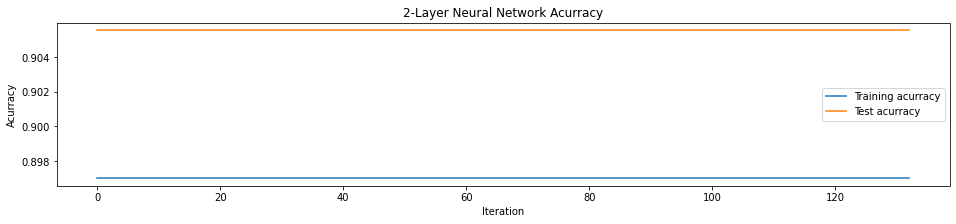

In [67]:
plotAcurracy(pred_train_2L_cache, pred_test_2L_cache, '2-Layer Neural Network Acurracy')
#plotAcurracy(pred_train_3L_cache, pred_test_3L_cache, '3-Layer Neural Network Acurracy')